In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

%matplotlib inline 
sns.set(color_codes=True)

In [2]:
# read in the .csv file - of filtered student_info

data_df = pd.read_csv("filtered_df2_A2.csv")

In [3]:
#data_df.info()

### One-Hot Encoding - categorical data

In [4]:
# One-Hot Encoding for 'highest_education', 'age_band', 'final_result', 'tenure_band'

data_df_encoded = pd.get_dummies(data_df, columns=['highest_education', 'age_band', 'final_result', 'tenure_band'])


In [5]:
#data_df_encoded.info()

In [6]:
# convert the dtype of the recently one-hot encoded columns to int64 from uint8 dtype

columns_to_convert = [
    'highest_education_A Level or Equivalent',
    'highest_education_HE Qualification',
    'highest_education_Lower Than A Level',
    'highest_education_Post Graduate Qualification',
    'age_band_0-35',
    'age_band_35-55',
    'age_band_55<=',
    'final_result_Distinction',
    'final_result_Fail',
    'final_result_Pass',
    'final_result_Withdrawn', 
    'tenure_band_0-5',
    'tenure_band_11-15',
    'tenure_band_16 or more',
    'tenure_band_5-10'
]

# Convert the selected columns to int64 dtype
data_df_encoded[columns_to_convert] = data_df_encoded[columns_to_convert].astype('int64')

In [7]:
data_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   id_student                                     383 non-null    int64
 1   gender                                         383 non-null    int64
 2   studied_credits                                383 non-null    int64
 3   highest_education_A Level or Equivalent        383 non-null    int64
 4   highest_education_HE Qualification             383 non-null    int64
 5   highest_education_Lower Than A Level           383 non-null    int64
 6   highest_education_Post Graduate Qualification  383 non-null    int64
 7   age_band_0-35                                  383 non-null    int64
 8   age_band_35-55                                 383 non-null    int64
 9   age_band_55<=                                  383 non-null    int64
 10  fi

### Algorithm 5 - Multilayer Perceptron (MLP)

In [8]:
# machine learning libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# model layers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

### Hyperparameter Tuning with GridSearchCV

#### References 
1. https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
2. https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/
3. https://www.geeksforgeeks.org/hyperparameter-tuning-using-gridsearchcv-and-kerasclassifier/

In [9]:
# Function to create and return the Keras model

def create_model(optimizer='adam', neurons_layer1=20, neurons_layer2=10):
    
    model = Sequential()
    
    # Hidden layer 1 with neuron count taken from the param_grid values, and relu as the activation function
    model.add(Dense(neurons_layer1, input_dim=X_train.shape[1], activation='relu'))
    
    # Hidden layer 2 with neuron count taken from the param_grid values, and relu as the activation function
    model.add(Dense(neurons_layer2, activation='relu'))
    
    # Final layer with 1 neuron, and sigmoid as the activation function
    # use 'softmax' for multiclass classification
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    # use 'categorical_crossentropy' for multiclass classification
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [10]:
# Wrap the model using KerasClassifier 
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


C:\Users\sinea\AppData\Local\Temp\ipykernel_17384\178003574.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


In [11]:
# Define hyperparameter grid
param_grid = {
    'optimizer': ['SGD', 'RMSprop', 'Adam'],
    'batch_size': [16, 32, 64],
    'neurons_layer1': [10, 20, 30],
    'neurons_layer2': [5, 10, 15],
    'epochs': [10, 20]
}

In [12]:
# divide the dataset into features (X) and the target variable (y)

X = data_df_encoded.drop(columns=['studied_credits'])  # drop target variable from the dataframe

y = data_df_encoded['studied_credits']        # id target variable 

In [13]:
# split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# Perform grid search using GridSearchCV

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

grid_result = grid.fit(X_train, y_train)

In [15]:
# Print the best hyperparameters

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.669935 using {'batch_size': 16, 'epochs': 10, 'neurons_layer1': 10, 'neurons_layer2': 5, 'optimizer': 'SGD'}


In [27]:
# fit the model
#model.fit(X_train, y_train, epochs=10, batch_size=32)

# fit the model and store the output for graphing

history = model.fit(X_train, y_train, epochs=10, batch_size=32)

#history_test = model.fit(X_test, y_test, epochs=10, batch_size=32)

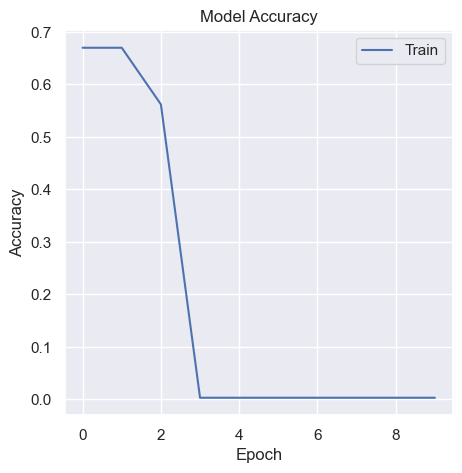

In [25]:
# Plotting the accuracy
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'])


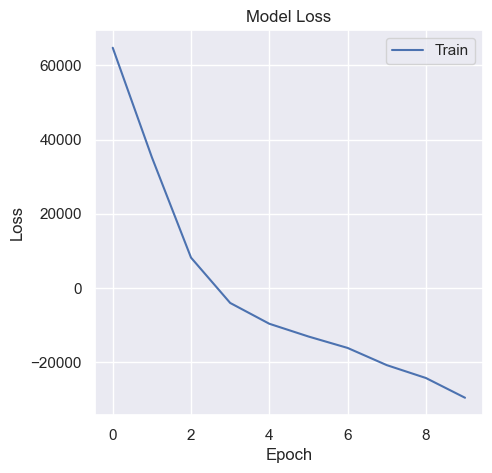

In [26]:
# Plotting the loss
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'])
plt.show()